# ETF轮动策略

这个策略是ETF轮动策略的一个简单实现

标的有：上证50ETF（510050）、创业板50ETF（159949），无脑全仓多空，按收盘价计算，哪一只股票的close/MA20 - 1，若都小于0则清仓，买入大于0时两者中较高者

In [72]:
import akshare as ak
import numpy as np
import pandas as pd

all_index = ak.stock_zh_index_spot()
all_index

In [6]:
SZ50_ETF = ak.fund_etf_hist_em(symbol='510050', adjust='qfq', start_date='20160722')
SZ50_ETF

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2016-07-22,1.886,1.868,1.890,1.867,1017701,2.246421e+08,1.22,-1.06,-0.020,0.43
1,2016-07-25,1.867,1.869,1.878,1.865,1008018,2.221032e+08,0.70,0.05,0.001,0.42
2,2016-07-26,1.869,1.895,1.897,1.865,1914550,4.245916e+08,1.71,1.39,0.026,0.80
3,2016-07-27,1.896,1.883,1.900,1.840,2926171,6.443228e+08,3.17,-0.63,-0.012,1.23
4,2016-07-28,1.871,1.879,1.886,1.861,1235216,2.727764e+08,1.33,-0.21,-0.004,0.52
...,...,...,...,...,...,...,...,...,...,...,...
1713,2023-08-09,2.700,2.709,2.718,2.698,9569187,2.592591e+09,0.74,0.00,0.000,4.01
1714,2023-08-10,2.704,2.706,2.712,2.686,6707250,1.812057e+09,0.96,-0.11,-0.003,2.81
1715,2023-08-11,2.706,2.642,2.708,2.640,13165393,3.507924e+09,2.51,-2.37,-0.064,5.51
1716,2023-08-14,2.615,2.622,2.628,2.601,7019116,1.837370e+09,1.02,-0.76,-0.020,2.94


In [7]:
CYB50_ETF = ak.fund_etf_hist_em(symbol='159949', adjust='qfq', start_date='20160722')
CYB50_ETF

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2016-07-22,0.992,0.987,0.997,0.980,1527866,1.511824e+08,0.00,0.00,0.000,0.80
1,2016-07-25,0.985,0.978,0.991,0.976,575244,5.657412e+07,1.52,-0.91,-0.009,0.30
2,2016-07-26,0.978,0.995,0.996,0.978,651064,6.450203e+07,1.84,1.74,0.017,0.34
3,2016-07-27,0.997,0.940,0.999,0.931,855069,8.225066e+07,6.83,-5.53,-0.055,0.45
4,2016-07-28,0.940,0.933,0.946,0.916,300326,2.806229e+07,3.19,-0.74,-0.007,0.16
...,...,...,...,...,...,...,...,...,...,...,...
1713,2023-08-09,0.948,0.950,0.956,0.947,4114829,3.911641e+08,0.95,-0.11,-0.001,2.16
1714,2023-08-10,0.951,0.955,0.956,0.946,4449886,4.238196e+08,1.05,0.53,0.005,2.33
1715,2023-08-11,0.954,0.931,0.955,0.931,6581204,6.192760e+08,2.51,-2.51,-0.024,3.45
1716,2023-08-14,0.921,0.919,0.923,0.910,10078435,9.249513e+08,1.40,-1.29,-0.012,5.28


In [39]:
SZ50_close = SZ50_ETF[['收盘', '日期', '开盘']]
SZ50_close.rename(columns={'收盘': '上证50ETF', '开盘': '上证50开盘'}, inplace=True)
CYB50_close = CYB50_ETF[['收盘', '日期', '开盘']]
CYB50_close.rename(columns={'收盘': '创业板50ETF', '开盘': '创业板50开盘'}, inplace=True)
stock_data = pd.merge(SZ50_close, CYB50_close)
stock_data

C:\Users\sersmile\AppData\Local\Temp\ipykernel_2408\1071290889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SZ50_close.rename(columns={'收盘': '上证50ETF', '开盘': '上证50开盘'}, inplace=True)
C:\Users\sersmile\AppData\Local\Temp\ipykernel_2408\1071290889.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CYB50_close.rename(columns={'收盘': '创业板50ETF', '开盘': '创业板50开盘'}, inplace=True)


,上证50ETF,日期,上证50开盘,创业板50ETF,创业板50开盘
0,1.868,2016-07-22,1.886,0.987,0.992
1,1.869,2016-07-25,1.867,0.978,0.985
2,1.895,2016-07-26,1.869,0.995,0.978
3,1.883,2016-07-27,1.896,0.940,0.997
4,1.879,2016-07-28,1.871,0.933,0.940
...,...,...,...,...,...
1713,2.709,2023-08-09,2.700,0.950,0.948
1714,2.706,2023-08-10,2.704,0.955,0.951
1715,2.642,2023-08-11,2.706,0.931,0.954
1716,2.622,2023-08-14,2.615,0.919,0.921


In [40]:
# 计算MA20
MA20 = pd.concat([stock_data[['上证50ETF', '创业板50ETF']].rolling(20).mean(), stock_data[['日期', '上证50开盘', '创业板50开盘']]], axis=1)
MA20.dropna(inplace=True)
MA20.rename(columns={'上证50ETF': '上证50MA', '创业板50ETF': '创业板50MA'}, inplace=True)
MA20

,上证50MA,创业板50MA,日期,上证50开盘,创业板50开盘
19,1.89660,0.94025,2016-08-18,1.969,0.954
20,1.90165,0.93885,2016-08-19,1.957,0.963
21,1.90595,0.93695,2016-08-22,1.968,0.956
22,1.90910,0.93425,2016-08-23,1.956,0.940
23,1.91235,0.93480,2016-08-24,1.960,0.943
...,...,...,...,...,...
1713,2.65635,0.93840,2023-08-09,2.700,0.948
1714,2.66120,0.93855,2023-08-10,2.704,0.951
1715,2.66285,0.93775,2023-08-11,2.706,0.954
1716,2.66475,0.93685,2023-08-14,2.615,0.921


In [41]:
all_data = pd.merge(MA20, stock_data)
all_data

,上证50MA,创业板50MA,日期,上证50开盘,创业板50开盘,上证50ETF,创业板50ETF
0,1.89660,0.94025,2016-08-18,1.969,0.954,1.958,0.959
1,1.90165,0.93885,2016-08-19,1.957,0.963,1.969,0.959
2,1.90595,0.93695,2016-08-22,1.968,0.956,1.955,0.940
3,1.90910,0.93425,2016-08-23,1.956,0.940,1.958,0.941
4,1.91235,0.93480,2016-08-24,1.960,0.943,1.948,0.951
...,...,...,...,...,...,...,...
1694,2.65635,0.93840,2023-08-09,2.700,0.948,2.709,0.950
1695,2.66120,0.93855,2023-08-10,2.704,0.951,2.706,0.955
1696,2.66285,0.93775,2023-08-11,2.706,0.954,2.642,0.931
1697,2.66475,0.93685,2023-08-14,2.615,0.921,2.622,0.919


In [50]:
all_data['上证50信号'] = all_data['上证50ETF'] / all_data['上证50MA']
all_data['创业板50信号'] = all_data['创业板50ETF'] / all_data['创业板50MA']
all_data

,上证50MA,创业板50MA,日期,上证50开盘,创业板50开盘,上证50ETF,创业板50ETF,上证50信号,创业板50信号
0,1.89660,0.94025,2016-08-18,1.969,0.954,1.958,0.959,1.032374,1.019942
1,1.90165,0.93885,2016-08-19,1.957,0.963,1.969,0.959,1.035417,1.021462
2,1.90595,0.93695,2016-08-22,1.968,0.956,1.955,0.940,1.025735,1.003255
3,1.90910,0.93425,2016-08-23,1.956,0.940,1.958,0.941,1.025614,1.007225
4,1.91235,0.93480,2016-08-24,1.960,0.943,1.948,0.951,1.018642,1.017330
...,...,...,...,...,...,...,...,...,...
1694,2.65635,0.93840,2023-08-09,2.700,0.948,2.709,0.950,1.019820,1.012361
1695,2.66120,0.93855,2023-08-10,2.704,0.951,2.706,0.955,1.016835,1.017527
1696,2.66285,0.93775,2023-08-11,2.706,0.954,2.642,0.931,0.992170,0.992802
1697,2.66475,0.93685,2023-08-14,2.615,0.921,2.622,0.919,0.983957,0.980947


In [51]:
initial_date = all_data.iloc[1,:]['日期']
initial_date

'2016-08-19'

In [52]:
# 开始执行策略回测
backtest_dict = {'capital': [100000], 'SZ_position': [0], 'CYB_position': [0], 'date': [initial_date]}
backtest = pd.DataFrame(backtest_dict)


def sell(symbol=None, how='specific', data=None):
    """
    卖出ETF
    :param symbol: ETF对应的缩写，上证50为SZ，创业板50为CYB
    :param how: any为全卖出，不填写必填symbol
    :param data: 第二天的股价！
    """
    global backtest
    capital = backtest.loc[len(backtest) - 1, :]['capital']
    SZ_position = backtest.loc[len(backtest) - 1, :]['SZ_position']
    CYB_position = backtest.loc[len(backtest) -1, :]['CYB_position']
    if how == 'any':
        capital += SZ_position * data['上证50开盘']
        capital += CYB_position * data['创业板50开盘']
        SZ_position = 0
        CYB_position = 0
    else:
        if symbol == 'SZ':
            capital += SZ_position * data['上证50开盘']
            SZ_position = 0
        else:
            capital += CYB_position * data['创业板50开盘']
            CYB_position = 0
    backtest.loc[len(backtest), :] = [capital, SZ_position, CYB_position, data['日期']]


def buy(symbol=None, data=None):
    """
    买入某只ETF
    :param symbol: ETF对应的缩写，上证50为SZ，创业板50为CYB
    :param data: 第二天的股价
    """
    global backtest
    capital = backtest.loc[len(backtest) - 1, :]['capital']
    SZ_position = backtest.loc[len(backtest) - 1, :]['SZ_position']
    CYB_position = backtest.loc[len(backtest) -1, :]['CYB_position']
    if symbol == 'SZ':
        SZ_position += capital / data['上证50开盘']
        capital = 0
    else:
        CYB_position += capital / data['创业板50开盘']
        capital = 0
    backtest.loc[len(backtest), :] = [capital, SZ_position, CYB_position, data['日期']]


for i in range(all_data.shape[0] - 1):
    today_data = all_data.iloc[i, :]  # 每一天的数据，按照这个数据在第二天进行交易
    tomorrow_data = all_data.iloc[i+1, :]
    if today_data['上证50信号'] < 1 and today_data['创业板50信号'] < 1:
        sell(how='any', data=tomorrow_data)
    elif today_data['上证50信号'] > today_data['创业板50信号']:
        buy(symbol='SZ', data=today_data)
    elif today_data['上证50信号'] < today_data['创业板50信号']:
        buy(symbol='CYB', data=tomorrow_data)

backtest

,capital,SZ_position,CYB_position,date
0,100000.000000,0.000000,0.000000,2016-08-19
1,0.000000,50787.201625,0.000000,2016-08-18
2,0.000000,50787.201625,0.000000,2016-08-19
3,0.000000,50787.201625,0.000000,2016-08-22
4,0.000000,50787.201625,0.000000,2016-08-23
...,...,...,...,...
1694,0.000000,0.000000,230338.311376,2023-08-08
1695,0.000000,0.000000,230338.311376,2023-08-09
1696,0.000000,0.000000,230338.311376,2023-08-11
1697,212141.584777,0.000000,0.000000,2023-08-14


In [53]:
result = pd.merge(backtest.rename(columns={'date': '日期'}), all_data)
result

,capital,SZ_position,CYB_position,日期,上证50MA,创业板50MA,上证50开盘,创业板50开盘,上证50ETF,创业板50ETF,上证50信号,创业板50信号
0,100000.000000,0.000000,0.000000,2016-08-19,1.90165,0.93885,1.957,0.963,1.969,0.959,1.035417,1.021462
1,0.000000,50787.201625,0.000000,2016-08-19,1.90165,0.93885,1.957,0.963,1.969,0.959,1.035417,1.021462
2,0.000000,50787.201625,0.000000,2016-08-18,1.89660,0.94025,1.969,0.954,1.958,0.959,1.032374,1.019942
3,0.000000,50787.201625,0.000000,2016-08-22,1.90595,0.93695,1.968,0.956,1.955,0.940,1.025735,1.003255
4,0.000000,50787.201625,0.000000,2016-08-23,1.90910,0.93425,1.956,0.940,1.958,0.941,1.025614,1.007225
...,...,...,...,...,...,...,...,...,...,...,...,...
1694,0.000000,0.000000,230338.311376,2023-08-08,2.64930,0.93760,2.705,0.954,2.709,0.951,1.022534,1.014292
1695,0.000000,0.000000,230338.311376,2023-08-09,2.65635,0.93840,2.700,0.948,2.709,0.950,1.019820,1.012361
1696,0.000000,0.000000,230338.311376,2023-08-11,2.66285,0.93775,2.706,0.954,2.642,0.931,0.992170,0.992802
1697,212141.584777,0.000000,0.000000,2023-08-14,2.66475,0.93685,2.615,0.921,2.622,0.919,0.983957,0.980947


In [54]:
result['asset'] = result['上证50ETF'] * result['SZ_position'] + result['创业板50ETF'] * result['CYB_position'] + result['capital']
result

,capital,SZ_position,CYB_position,日期,上证50MA,创业板50MA,上证50开盘,创业板50开盘,上证50ETF,创业板50ETF,上证50信号,创业板50信号,asset
0,100000.000000,0.000000,0.000000,2016-08-19,1.90165,0.93885,1.957,0.963,1.969,0.959,1.035417,1.021462,100000.000000
1,0.000000,50787.201625,0.000000,2016-08-19,1.90165,0.93885,1.957,0.963,1.969,0.959,1.035417,1.021462,100000.000000
2,0.000000,50787.201625,0.000000,2016-08-18,1.89660,0.94025,1.969,0.954,1.958,0.959,1.032374,1.019942,99441.340782
3,0.000000,50787.201625,0.000000,2016-08-22,1.90595,0.93695,1.968,0.956,1.955,0.940,1.025735,1.003255,99288.979177
4,0.000000,50787.201625,0.000000,2016-08-23,1.90910,0.93425,1.956,0.940,1.958,0.941,1.025614,1.007225,99441.340782
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,0.000000,0.000000,230338.311376,2023-08-08,2.64930,0.93760,2.705,0.954,2.709,0.951,1.022534,1.014292,219051.734119
1695,0.000000,0.000000,230338.311376,2023-08-09,2.65635,0.93840,2.700,0.948,2.709,0.950,1.019820,1.012361,218821.395807
1696,0.000000,0.000000,230338.311376,2023-08-11,2.66285,0.93775,2.706,0.954,2.642,0.931,0.992170,0.992802,214444.967891
1697,212141.584777,0.000000,0.000000,2023-08-14,2.66475,0.93685,2.615,0.921,2.622,0.919,0.983957,0.980947,212141.584777


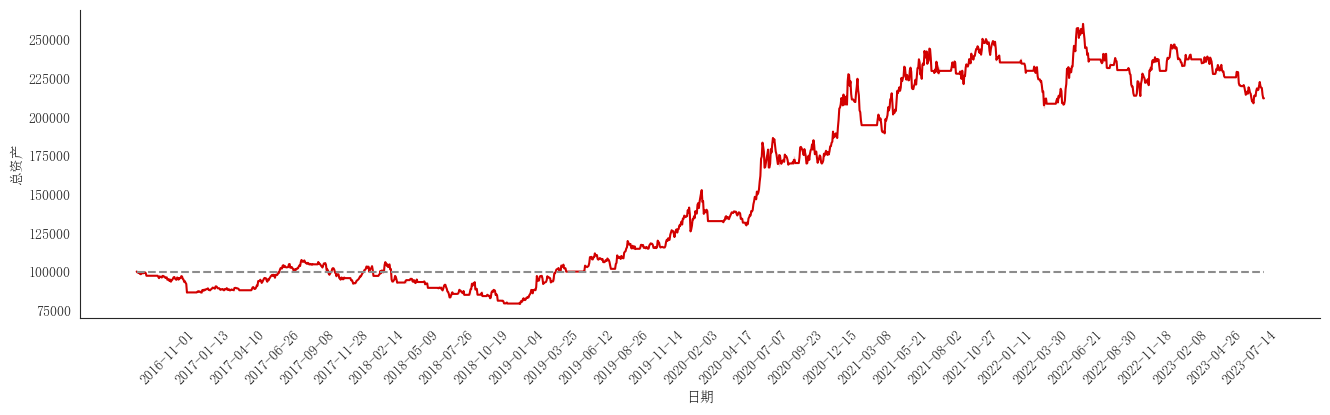

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams['font.family'] = 'SimSun'
plt.rcParams['axes.unicode_minus'] = False

ax = sns.lineplot(data=result, x='日期', y='asset', color='#d20000')
sns.set_style('white')
sns.despine()
ax.figure.set_size_inches(16, 4)
ax.set_xlabel('日期')
ax.set_ylabel('总资产')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=50))
plt.xticks(rotation=45)
ax.hlines(y=100000, xmin=result.loc[0, :]['日期'], xmax=result.loc[len(result) - 1, :]['日期'], colors='#8c8c8c', linestyles='--')
plt.show()

In [69]:
asset = result[['日期', 'asset']]
asset

,日期,asset
0,2016-08-19,100000.000000
1,2016-08-19,100000.000000
2,2016-08-18,99441.340782
3,2016-08-22,99288.979177
4,2016-08-23,99441.340782
...,...,...
1694,2023-08-08,219051.734119
1695,2023-08-09,218821.395807
1696,2023-08-11,214444.967891
1697,2023-08-14,212141.584777


In [70]:
asset = asset[['日期']].join(asset[['asset']].pct_change())
asset

,日期,asset
0,2016-08-19,NaN
1,2016-08-19,0.000000
2,2016-08-18,-0.005587
3,2016-08-22,-0.001532
4,2016-08-23,0.001535
...,...,...
1694,2023-08-08,-0.004188
1695,2023-08-09,-0.001052
1696,2023-08-11,-0.020000
1697,2023-08-14,-0.010741


In [79]:
asset.dropna(inplace=True)
yearly_volatility = asset['asset'].std() * np.sqrt(len(asset) / 252)
yearly_yield = (result[['asset']].loc[len(result)-1, :]['asset'] / 100000) ** (252 / len(asset)) - 1
sharpe = (yearly_yield - 0.03) / yearly_volatility
sharpe

2.581528207023855